# Statistics for Machine Learning: Part#1

### Descriptive Statistics = Exploratory Data Analysis (EDA)


1. Hypothesis finalization ( e.g., Smokers are tend to give more tip)
2. Libraries Import
3. Data import (csv, link)
4. Data glimpse (head, tail, sample.,,)
5. Data shape (rows, column)
6. Data type (info, dtypes)
7. Data overall statistics (describe)
8. Data Cleaning:
    A. Null values ( fill/impute, delete)
    B. Duplicates (remove)
    C. Outliers (IQR) #subjective
    D. Feature Engineering (column manipulation) -- Modeling/hypothesis
    E. Normality (log, minmax, ...)
9. Hypothesis -- data format
10. Visualization..     

In [1]:
# Libraries import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
# Data load
df = sns.load_dataset("titanic")
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
# data information
print("Rows:", df.shape[0],"\nColumns:", df.shape[1])

df.info()

Rows: 891 
Columns: 15
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [52]:
# Data cleaning:
# 1. Missing values
null_values = df.isnull().sum().sort_values(ascending = False)
null_values

deck           688
age            177
embarked         2
embark_town      2
survived         0
pclass           0
sex              0
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
alive            0
alone            0
dtype: int64

In [18]:
# percentage of null values
per_null = ((null_values / df.shape[0]) * 100).sort_values(ascending = False)
per_null

deck           77.216611
age            19.865320
embarked        0.224467
embark_town     0.224467
survived        0.000000
pclass          0.000000
sex             0.000000
sibsp           0.000000
parch           0.000000
fare            0.000000
class           0.000000
who             0.000000
adult_male      0.000000
alive           0.000000
alone           0.000000
dtype: float64

In [ ]:
# deck: REMOVE THAT COLUMN >40%
df.drop("deck", axis = 1, inplace = True) 

In [21]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

### TASK


fill missing data with 0

In [22]:
df['age'].fillna(0, inplace=True)

In [31]:
df.isnull().sum().sort_values(ascending = False)

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [25]:
# deleting null values from 2 columns
df.dropna(subset=['embarked','embark_town'], inplace=True)

In [28]:
# DUPLICATES
df.duplicated().sum()

0

In [27]:
df.drop_duplicates(inplace=True)

### TASK

make a dataframe of your choice and delete duplicate values

In [39]:
# Create a list of list with 3 columns and 7 rows each
asiacup_2023 = [['bangladesh',265 ,8],['india', 213, 10], ['pakistan',342, 6 ], ['bangladesh' , 265, 8], ['afghanistan', 245, 10], ['nepal',230 , 10], ['bangladesh',265 ,8] ]
ac = pd.DataFrame(asiacup_2023, columns=['country_name', 'score', 'wickets'])
ac

,country_name,score,wickets
0,bangladesh,265,8
1,india,213,10
2,pakistan,342,6
3,bangladesh,265,8
4,afghanistan,245,10
5,nepal,230,10
6,bangladesh,265,8


In [40]:
#checking duplicate values
ac.duplicated().sum()

2

In [41]:
ac.drop_duplicates(inplace=True)

In [42]:
#again checking for duplicate values
ac.duplicated().sum()


0

In [43]:
ac

,country_name,score,wickets
0,bangladesh,265,8
1,india,213,10
2,pakistan,342,6
4,afghanistan,245,10
5,nepal,230,10


In [44]:
#index_reset
ac.reset_index(drop=True, inplace=True)

In [45]:
ac

,country_name,score,wickets
0,bangladesh,265,8
1,india,213,10
2,pakistan,342,6
3,afghanistan,245,10
4,nepal,230,10


In [47]:
# file saving in csv
ac.to_csv("clean_data.csv", index_label=False) 

In [53]:
# UNIVARIATE

# How many people are actually survived
df['survived'].value_counts()

survived
0    549
1    342
Name: count, dtype: int64

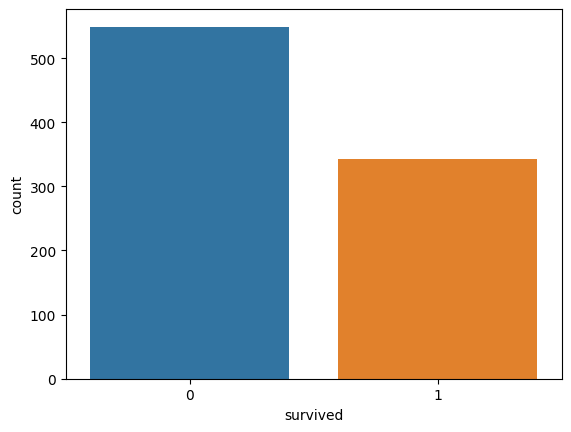

In [54]:
sns.countplot(x='survived', data=df)
plt.show()

# ADD the percentage of each category

In [55]:
# Bivariate

# Survival rate vs p class
df.groupby('pclass')['survived'].sum()


pclass
1    136
2     87
3    119
Name: survived, dtype: int64

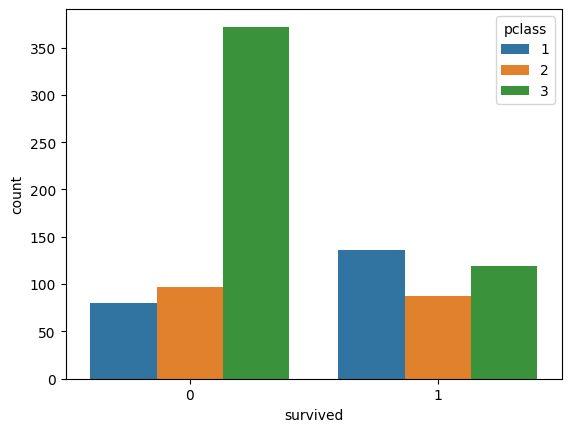

In [56]:
sns.countplot(x='survived', data=df, hue='pclass')
plt.show()

In [62]:
df['parch'] = df['parch'].astype(str)
df['sibsp'] = df['sibsp'].astype(str)

df['family'] = df['parch'] + " " + df['sibsp']

In [63]:
# Survival rate vs family
df.groupby('family')['survived'].sum()

family
0 0    163
0 1     64
0 2      4
0 3      2
1 0     25
1 1     34
1 2      6
1 3      0
1 4      0
2 0     21
2 1     12
2 2      2
2 3      2
2 4      3
2 5      0
2 8      0
3 0      1
3 1      1
3 2      1
4 0      0
4 1      0
5 0      0
5 1      1
6 1      0
Name: survived, dtype: int64

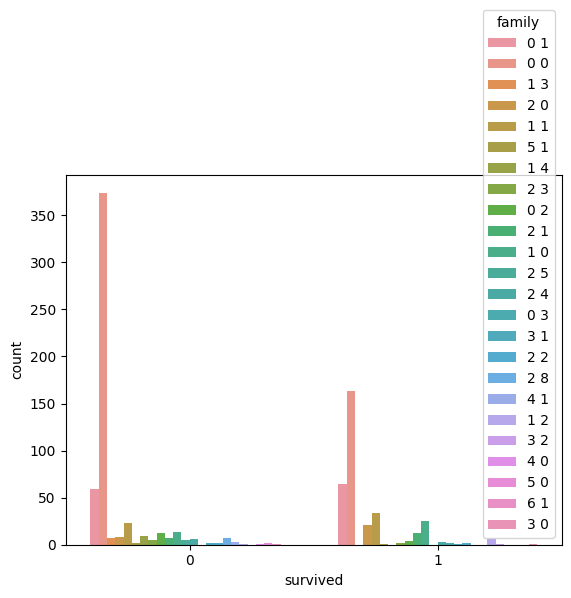

In [64]:
sns.countplot(x='survived', data=df, hue='family')
plt.show()